
# Used Cars

We would like to build an app to search for used cars in the area, based on the price, year,
mileage, make and model. We will be working with the Kaggle dataset, that was acquired by
TrueCar.com for used car listings on 9/24/2017.

We will begin by importing all of the required libraries.

In [ ]:
import numpy as np
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
sns.set(color_codes=True)

We are importing the CSV we retreived from Kaggle and saved on our desktop. 

In [4]:
UsedCars = pd.read_csv("/Users/Nora/Desktop/true_car_listings.csv")

Taking a quick look at the datset to see if there are improvements or even just to see what the data looks like. 

In [5]:
UsedCars.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [6]:
UsedCars.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

We will verify if there are any NA's in the dataset just to be sure. 

In [10]:
UsedCars.isnull().sum(axis=0)

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

In [7]:
UsedCars.corr()

,Price,Year,Mileage
Price,1.000000,0.401250,-0.421237
Year,0.401250,1.000000,-0.764849
Mileage,-0.421237,-0.764849,1.000000


In [11]:
UsedCars.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [34]:
UsedCars.sample(20)

,Price,Year,Mileage,City,State,Vin,Make,Model,Transmission
502164,28718,2016,17700,Corpus Christi,TX,1C4AJWAG8GL123098,Jeep,WranglerSport,NaN
173224,36988,2015,66927,San Rafael,CA,1GNSKBKC5FR273906,Chevrolet,Tahoe4WD,NaN
325482,17888,2005,72989,Woodland Hills,CA,1FTWX32P95EC19096,Ford,Super,NaN
359520,29999,2015,13504,Granite City,IL,1GTV2TEC7FZ399658,GMC,Sierra,NaN
37408,24488,2014,55998,San Diego,CA,WBA5B1C58ED480508,BMW,5,NaN
757800,12998,2016,84887,Oklahoma City,OK,4T1BF1FK1GU126047,Toyota,CamryLE,NaN
57766,18980,2016,14734,Perry,GA,1G4PW5SK3G4175673,Buick,VeranoSport,NaN
569187,36400,2015,34280,Portland,OR,2T2BK1BA0FC317107,Lexus,RX,NaN
793922,11095,2011,102085,Highland,IN,2T1KU4EEXBC552414,Toyota,Matrix5dr,NaN
547885,20998,2015,35185,Murfreesboro,TN,5XXGR4A66FG356751,Kia,OptimaSX,NaN


Producing a quick statistical summary to see what the mean and standard deviation, as well as all of the other available measurements. 

In [9]:
print("Table 1: Summary of Statistical Measurements")
UsedCars.describe(include='all').T

Table 1: Summary of Statistical Measurements


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Price,852122,NaN,NaN,NaN,21464.1,13596.2,1500,13000,18500,26995,499500
Year,852122,NaN,NaN,NaN,2013.29,3.41499,1997,2012,2014,2016,2018
Mileage,852122,NaN,NaN,NaN,52507.8,41989,5,23836,40256,72186,2.8562e+06
City,852122,2553,Houston,12703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,852122,59,TX,94654,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vin,852122,852075,1G1BE5SM6H7103748,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Make,852122,58,Ford,110432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,852122,2736,Silverado,24932,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We're creating a new column called "Transmission" to represent if the vehicle is automatic or manual transmission - when the information is available in the Model column. 

In [17]:
UsedCars['Transmission'] = UsedCars.Model.str.extract('(Speed|Automatic)')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [18]:
UsedCars.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,Transmission
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed,Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed,Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed,Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic,Automatic


We notice we creating the new column, but the Model column still includes the Speed and Automatic values. Let's clean that up. 

In [21]:
UsedCars['Model'] = UsedCars['Model'].str.replace('-Speed', '')
UsedCars['Model'] = UsedCars['Model'].str.replace('-Automatic', '')
UsedCars['Model'] = UsedCars['Model'].str.replace('Speed', '')
UsedCars['Model'] = UsedCars['Model'].str.replace('Automatic', '')
UsedCars.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,Transmission
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6,Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5,Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6,Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5,Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILX,Automatic


Since we created a new column, we will check again if there are any NA values. 

In [24]:
UsedCars.isnull().sum(axis=0)

Price                0
Year                 0
Mileage              0
City                 0
State                0
Vin                  0
Make                 0
Model                0
Transmission    845369
dtype: int64

When splitting the Model column and creating the Transmission column, it created multiple lines with NA values. Let's clean that up by filling the NAs with blank. 

In [38]:
UsedCars.Transmission = UsedCars.Transmission.fillna('')

In [39]:
UsedCars.isnull().sum(axis=0)

Price           0
Year            0
Mileage         0
City            0
State           0
Vin             0
Make            0
Model           0
Transmission    0
dtype: int64

Now lets move on to see which Make we have the most listings for available 

In [22]:
UsedCars.Make.value_counts()

Ford             110432
Chevrolet        102268
Toyota            77786
Nissan            66250
Honda             50193
Jeep              40373
Hyundai           35837
Dodge             34368
BMW               32415
GMC               29008
Kia               28636
Mercedes-Benz     26323
Volkswagen        23249
Lexus             20641
Ram               19808
Subaru            16428
Chrysler          16357
Cadillac          15047
Mazda             13365
Audi              12618
Buick             12491
INFINITI          12258
Acura             11049
Lincoln            7120
Volvo              5106
MINI               4375
Porsche            4106
Land               4096
Mitsubishi         4080
Scion              3043
Jaguar             2200
Pontiac            1783
FIAT               1782
Mercury            1076
Maserati           1047
Saturn              963
HUMMER              949
smart               713
Bentley             367
Ferrari             345
Suzuki              334
Saab            

The most available vehicle is clearly the FORD by a large percentage. Now within the FORD category, which models are the most available. 

In [23]:
UsedCars[UsedCars.Make == "Ford"].Model.value_counts()

F-1504WD              14177
Super                  7953
FusionSE               6388
F-1502WD               5144
FocusSedan             4642
EscapeFWD              4245
FocusHatchback         3623
ExplorerXLT            3325
Escape4WD              3239
EdgeSEL                2754
Mustang2dr             2703
F-150SuperCrew         2495
Explorer4WD            2459
EscapeSE               2418
MustangFastback        2354
Fusion4dr              2337
Transit                1758
Edge4dr                1627
FusionTitanium         1592
Focus4dr               1435
MustangConvertible     1416
EscapeTitanium         1394
MustangCoupe           1388
ExplorerFWD            1278
ExplorerLimited        1181
EdgeTitanium           1102
F-150XLT               1081
Expedition             1028
FiestaSedan            1023
C-Max                   985
                      ...  
Explorer2dr               7
RangerXL                  7
Contour4dr                6
EscapeXLS                 5
ExpeditionXL        

The most available vehicle is the FORD F-150AWD. 

Let's sort the data by year to see what the most recent vehicles included in this list are. 

In [43]:
UsedCars.sort_values(by=["Year"], ascending=False)

,Price,Year,Mileage,City,State,Vin,Make,Model,Transmission
52408,42995,2018,4433,Rochelle Park,NJ,WBA4J3C51JBB97662,BMW,4,
574259,89991,2018,3525,Towson,MD,JTHHP5AY2JA000656,Lexus,LCLC,
23527,71900,2018,1342,Lawrenceville,NJ,WUACSAFV7J1900408,Audi,TT,
236037,31895,2018,12,Deland,FL,1C4RDHAG4JC100656,Dodge,DurangoSXT,
548813,39890,2018,50,San Jose,CA,5XYPHDA50JG361586,Kia,SorentoEX,
801423,27249,2018,6,Mechanicsville,VA,4T1B11HK3JU018130,Toyota,CamrySE,
607073,33777,2018,2788,Sarasota,FL,WDDSJ4EB0JN510883,Mercedes-Benz,CLACLA,
21044,42230,2018,1000,Palo Alto,CA,WA1JCCFS5JR003005,Audi,Q3Premium,
54207,47494,2018,4281,Loveland,CO,WBA4J3C53JBB97341,BMW,4,
183990,63000,2018,30,Alliance,OH,1G1FK1R61J0105982,Chevrolet,CamaroCoupe,


Let's plot out the quantity of vehicles vs the year of the car. This way we can see which car year is most available. 

Cars Available based on Car Year


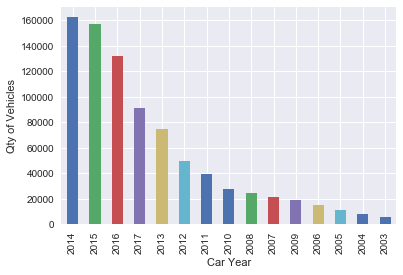

In [46]:
UsedCars['Year'].value_counts().head(15).plot.bar()
plt.xlabel('Car Year')
plt.ylabel('Qty of Vehicles')
print("Cars Available based on Car Year")

Let's look up any car that cost less than 10,000$ while sorting by year. 

In [52]:
UsedCars[UsedCars['Price' ] <= 10000]

,Price,Year,Mileage,City,State,Vin,Make,Model,Transmission
802453,2995,1997,167587,Grove City,OH,JT3GN87R6V0038945,Toyota,4Runner4dr,
802436,3721,1997,218029,Findlay,OH,JT3HP10V5V7042196,Toyota,RAV44dr,
146197,2950,1997,107976,Pinellas Park,FL,1GCCS1949VK132365,Chevrolet,S-102WD,
146165,4999,1997,65075,Phoenix,AZ,1GNDM19W0VB161096,Chevrolet,Astro,
802194,5888,1997,131123,Alpharetta,GA,JT3GN87R2V0053135,Toyota,4Runner4dr,
146068,4750,1997,95653,Osage City,KS,1GCCS19X1V8124865,Chevrolet,S-102WD,
801758,2450,1997,170099,Levittown,PA,JT3HN86R1V0055805,Toyota,4Runner4dr,
801678,3589,1997,155817,Brooklyn,NY,JT3HN86R4V0107346,Toyota,4Runner4dr,
145336,7000,1997,58521,Port Richey,FL,1G1YY22G0V5105528,Chevrolet,Corvette2dr,
223992,7999,1997,92438,Bellingham,WA,1B7KF26Z4VJ531017,Dodge,Ram,


In [ ]:
UsedCars.set_index('Price')['Year'].plot.bar()
plt.xlabel('Price')
plt.ylabel('Year')
print("Price Vs. Year")

#UsedCars['Year'].value_counts().head(15).plot.bar()
#plt.xlabel('Car Year')
#plt.ylabel('Qty of Vehicles')
#print("Cars Available based on Car Year")

In [ ]:
UsedCars('Price')['Year'].plot.bar()

In [ ]:
UsedCars.set_index('Price')['Year'].plot.bar()